In [1]:
import joblib
import numpy as np
import pylab as plt

In [2]:
data = joblib.load("samples_prior.joblib")

FileNotFoundError: [Errno 2] No such file or directory: 'samples_prior.joblib'

In [ ]:
x = data[2]['x']
plt.imshow(x)

NameError: name 'data' is not defined

In [ ]:
data = joblib.load("sample_dump_21984.joblib")
plt.imshow(data['x'])

FileNotFoundError: [Errno 2] No such file or directory: 'sample_dump_21984.joblib'

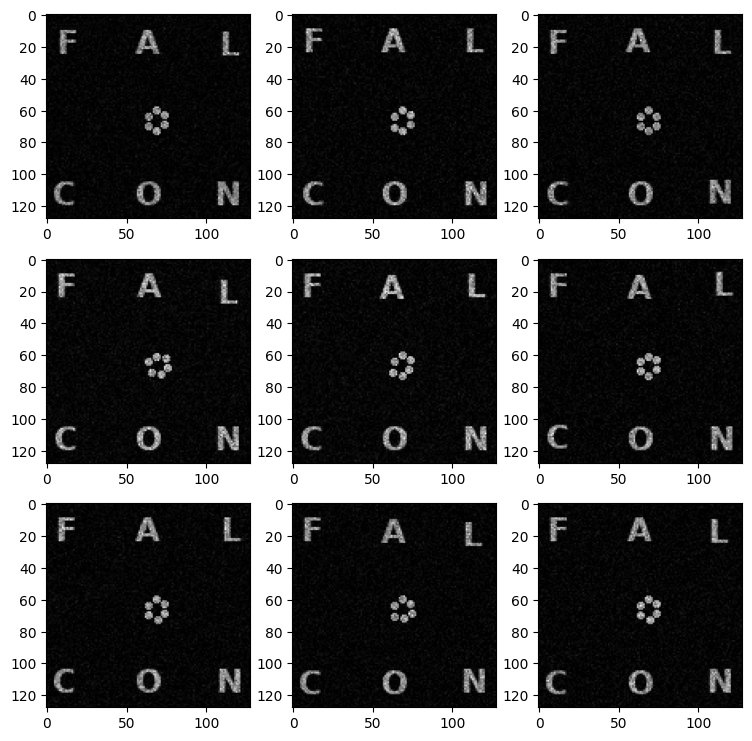

In [3]:
# Get all samples from filenames that start with "sample_dump_"
import glob
import re
filenames = glob.glob("sample_*.joblib")
steps = [int(re.search(r'sample_(\d+)\.joblib', fn).group(1)) for fn in filenames]
# Show the latest 9 examples in a 3 x 3 grid
latest_filenames = [fn for _, fn in sorted(zip(steps, filenames))][-9:]
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for ax, fn in zip(axes.flatten(), latest_filenames):
    data = joblib.load(fn)
    ax.imshow(data['x'], cmap='gray')
    #ax.set_title(f"Step {re.search(r'sample_dump_(\d+)\.joblib', fn).group(1)}")

In [4]:
# Turn the filenames into some animated gif
import imageio
images = []
for fn in sorted(filenames, key=lambda x: int(re.search(r'sample_(\d+)\.joblib', x).group(1))):
    data = joblib.load(fn)
    img = (data['x'] / np.max(data['x']) * 255).astype(np.uint8)
    images.append(img)
imageio.mimsave('sampling_progress_vB.gif', images, fps=8, loop = 0)
# Now save with looping forever
